In [295]:
from curses import flash
import os
from pickle import TRUE
from re import L
import requests
import validators
import gzip
import shutil
from urllib.parse import urlparse

import sys
import math
import xarray as xa
import numpy as np
from rio_cogeo import cog_validate
import rioxarray

# Mapping
import matplotlib as mpl
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [296]:
# input_file_path = "/home/asubedi/test_cog/NALMA_20230629_235000_600_10src_0.0109deg-dx_flash_extent.nc"
input_file_path = "/home/asubedi/test_cog/WTLMA_20170531_235000_600_10src_0.0108deg-dx_flash_extent.nc"
variable_name = "flash_extent"

# input_file_path = '/home/asubedi/Desktop/data/raw-files/TRMM-LIS/lis_vhrfc_1998_2013_v01.nc'
# variable_name = "VHRFC_LIS_FRD"

In [297]:
file1 = xa.open_dataset(input_file_path, engine="netcdf4", decode_coords='all', decode_times=False)
# file1 = file1[variable_name]

In [298]:
lat = file1.lat.data.copy()
lon = file1.lon.data.copy()
data = file1.flash_extent.data[0].copy()

In [299]:
print(len(lon))
print(len(lat))
print(data.shape)

400
400
(400, 400)


In [300]:
file2 = xa.Dataset(
    data_vars={"flash_extent": (("lon", "lat"), data)},
    coords={"lon": lon, "lat": lat},
    attrs={"instrument_ID": "NALMA"}
)

In [302]:
file2 = file2[variable_name]
file2 = file2[::-1]

KeyError: 'flash_extent'

In [ ]:
file2 = file2.transpose("lat","lon")
file2.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)
file2.rio.crs
file2.rio.set_crs('epsg:4326', inplace=True)

In [274]:
import random

name=f"S2A_20160724_135032_27XVB_B{random.randint(0,9)}{random.randint(0,9)}{random.randint(0,9)}.tif"
cog_path=f"/home/asubedi/test_cog/cogs/{name}"
file1.rio.to_raster(rf'{cog_path}', driver='COG')

print(name)

S2A_20160724_135032_27XVB_B463.tif


ERROR 1: PROJ: proj_create_from_name: /home/asubedi/miniconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_create_from_database: /home/asubedi/miniconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
Warning 1: PROJ: proj_create_from_database: /home/asubedi/miniconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [221]:
file2 = file2[variable_name]

In [261]:
print(f"Min lat: {min(file2.lat)}")
print(f"Max lat: {max(file2.lat)}")
print(f"Min lon: {min(file2.lon)}")
print(f"Max lon: {max(file2.lon)}")

Min lat: 31.7012996673584
Max lat: 35.29869842529297
Min lon: -103.6469497680664
Max lon: -99.3530502319336


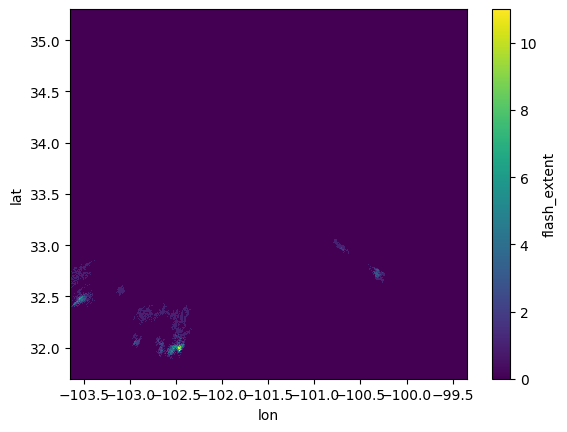

In [226]:
file2.plot()

In [223]:
file2 = file2.transpose("lat","lon")
file2.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)
file2.rio.crs
file2.rio.set_crs('epsg:4326', inplace=True)

ERROR 1: PROJ: proj_create_from_database: /home/asubedi/miniconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<xarray.DataArray 'flash_extent' (lat: 400, lon: 400)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float32 -103.6 -103.6 -103.6 -103.6 ... -99.37 -99.36 -99.35
  * lat      (lat) float32 31.7 31.71 31.72 31.73 ... 35.27 35.28 35.29 35.3

In [224]:
file2

<xarray.DataArray 'flash_extent' (lat: 400, lon: 400)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float32 -103.6 -103.6 -103.6 -103.6 ... -99.37 -99.36 -99.35
  * lat      (lat) float32 31.7 31.71 31.72 31.73 ... 35.27 35.28 35.29 35.3

In [225]:
import random

name=f"S2A_20160724_135032_27XVB_B{random.randint(0,9)}{random.randint(0,9)}{random.randint(0,9)}.tif"
cog_path=f"/home/asubedi/test_cog/cogs/{name}"
file2.rio.to_raster(rf'{cog_path}', driver='COG')

print(name)

S2A_20160724_135032_27XVB_B031.tif


ERROR 1: PROJ: proj_create_from_name: /home/asubedi/miniconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_create_from_database: /home/asubedi/miniconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
Warning 1: PROJ: proj_create_from_database: /home/asubedi/miniconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
